In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
dataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
#1.Replacing 0 to Nan values for salary
dataset.loc[dataset['status']== 'Not Placed','salary']=0
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
#2. Identifying No of students who are not placed
not_placed_count=dataset[dataset['status']=='Not Placed'].shape[0]
not_placed_count

67

In [6]:
#3. Reason for not placed , 1.Low percentage in acadamics, 2.Work experience, 3. Specialization/Type of degree
not_placed=dataset[dataset['status']=='Not Placed']

# Using Work Experience
print("Work Experience: ", not_placed['workex'].value_counts())

#Using specialisation
print(not_placed['specialisation'].value_counts())

#Using degree count
print("specialisation : ", not_placed['degree_t'].value_counts())

# Compare average scores of placed vs not placed with degree percentage
dataset.groupby('status')[['ssc_p','hsc_p','degree_p','etest_p','mba_p']].mean()

Work Experience:  No     57
Yes    10
Name: workex, dtype: int64
Mkt&HR     42
Mkt&Fin    25
Name: specialisation, dtype: int64
specialisation :  Comm&Mgmt    43
Sci&Tech     18
Others        6
Name: degree_t, dtype: int64


,ssc_p,hsc_p,degree_p,etest_p,mba_p
status,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836
Placed,71.721486,69.926554,68.740541,73.238041,62.579392


In [7]:
#4.What kind of relation between salary and mba_p
placed=dataset[dataset['status']=='Placed']
avg_salary_by_spec=placed.groupby('specialisation')['salary'].mean()
avg_salary_by_spec

specialisation
Mkt&Fin    298852.631579
Mkt&HR     270377.358491
Name: salary, dtype: float64

In [8]:
#5.Which specialization is getting minimum salary
min_salary_by_spec=avg_salary_by_spec.idxmin()
min_salary_value=avg_salary_by_spec.min()
print(min_salary_by_spec)
print(min_salary_value)

Mkt&HR
270377.358490566


In [9]:
# 6.Students getting salary > 5Lakhs
placed=dataset[dataset['status']=='Placed']
higher_salary=placed[placed['salary']>500000].shape[0]
higher_salary

3

In [10]:
#8 - Similarity between degree holders & specialization

from scipy.stats import ttest_ind
placed=dataset[dataset['status']=='Placed']
#placed

sci_techsalary=placed[placed['degree_t']=='Sci&Tech']['salary']
mkt_hr_salary=placed[placed['specialisation']=='Mkt&HR']['salary']
t_stat, p_value = ttest_ind(sci_techsalary, mkt_hr_salary, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"Probability-value: {p_value:.4f}")

sinificant_level = 0.05
if p_value < sinificant_level:
    print("There is a significant difference in salary between Sci&Tech degree holders and Mkt&HR specialization.")
else:
    print("No significant difference in salary between Sci&Tech degree holders and Mkt&HR specialization.")

T-statistic: 2.5503
Probability-value: 0.0134
There is a significant difference in salary between Sci&Tech degree holders and Mkt&HR specialization.


In [13]:
# 9. To convert normal distribution to standard normal distribution for salary
mean_salary=dataset['salary'].mean()
std_salary=dataset['salary'].std()

zscore_dataset=dataset
dataset['zscoreStandardisation'] = (dataset['salary'] - mean_salary) / std_salary
print(zscore_dataset[['salary','zscoreStandardisation']].head())

     salary  zscoreStandardisation
0  270000.0               0.460636
1  200000.0               0.008384
2  250000.0               0.331421
3       0.0              -1.283765
4  425000.0               1.462051


In [14]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,zscoreStandardisation
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0.460636
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0.008384
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,0.331421
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,-1.283765
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1.462051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1.300533
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,0.492940
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,0.622155
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,0.034227


In [15]:
#10. PDF for 700000 & 900000
from scipy.stats import norm
low, high = 700000, 900000
z_low = (low - mean_salary) / std_salary
z_high = (high - mean_salary) / std_salary

prob = norm.cdf(z_high) - norm.cdf(z_low)

print(f"Estimated probability of salary between 700000 and 900000: {prob:.4f}")

pdf_7L = norm.pdf((700000 - mean_salary) / std_salary)
pdf_9L = norm.pdf((900000 - mean_salary) / std_salary)

print(f"PDF at 700000: {pdf_7L:.8f}")
print(f"PDF at 900000: {pdf_9L:.8f}")

Estimated probability of salary between 700000 and 900000: 0.0006
PDF at 700000: 0.00210443
PDF at 900000: 0.00001390


In [16]:
#11. To find similarity between degree_t(sci&Tech) with etest_p & mba_p
group_sci=dataset[dataset['degree_t']=='Sci&Tech']
group_non_sci=dataset[dataset['degree_t']!='Sci&Tech']

t_stat_etest, p_etest = ttest_ind(group_sci['etest_p'], group_non_sci['etest_p'], equal_var=False)
t_stat_mba, p_mba = ttest_ind(group_sci['mba_p'], group_non_sci['mba_p'], equal_var=False)

sig_level=0.5
print("Hypothesis Test for etest_p & mba_p:")
print(f"statistic: {t_stat_etest:.4f}, probability_value: {p_etest:.4f}")
print(f"statistic: {t_stat_mba:.4f}, probability_value: {p_mba:.4f}")
if p_etest < sig_level:
    print("Significant difference in etest_p between Sci&Tech and others.\n")
else:
    print("No significant difference in etest_p.\n")

if p_mba < sig_level:
    print("Significant difference in p_mba between Sci&Tech and others.\n")
else:
    print("No significant difference in p_mba.\n")

Hypothesis Test for etest_p & mba_p:
statistic: 0.1392, probability_value: 0.8896
statistic: 1.8163, probability_value: 0.0723
No significant difference in etest_p.

Significant difference in p_mba between Sci&Tech and others.



In [19]:
#12.parameter is highly correlated with salary
placed = dataset[dataset['status'] == 'Placed']
numeric_cols = placed.select_dtypes(include='number')
#compute correlation with salary
correlation_with_salary = numeric_cols.corr()['salary'].sort_values(ascending=False)

# Display top correlated features
print("Correlation of features with salary:\n")
print(correlation_with_salary)

Correlation of features with salary:

zscoreStandardisation    1.000000
salary                   1.000000
etest_p                  0.178307
mba_p                    0.175013
hsc_p                    0.076819
sl_no                    0.063764
ssc_p                    0.035330
degree_p                -0.019272
Name: salary, dtype: float64


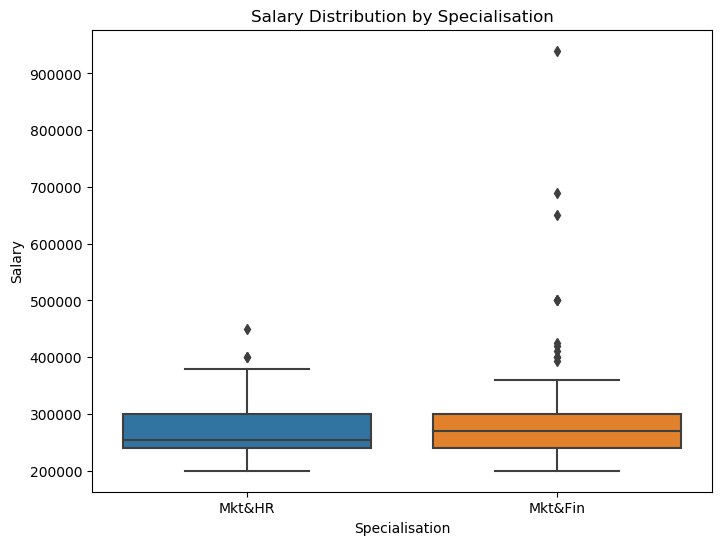

In [22]:
#13. box plot for salary Distribution

import matplotlib.pyplot as plt
import seaborn as sns
s
plt.figure(figsize=(8,6))
sns.boxplot(x='specialisation', y='salary', data=placed)
plt.title('Salary Distribution by Specialisation')
plt.xlabel('Specialisation')
plt.ylabel('Salary')
plt.show()

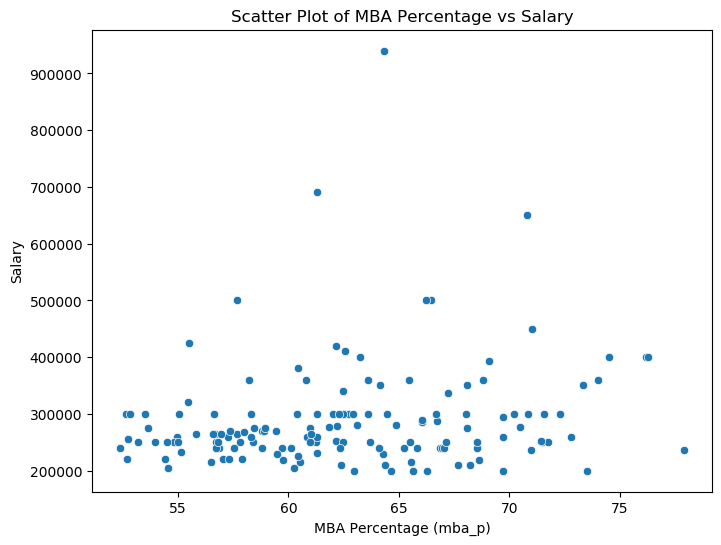

In [23]:
#13. Scatter plot for MBA Percentage & Salary

plt.figure(figsize=(8,6))
sns.scatterplot(x='mba_p', y='salary', data=placed)
plt.title('Scatter Plot of MBA Percentage vs Salary')
plt.xlabel('MBA Percentage (mba_p)')
plt.ylabel('Salary')
plt.show()